# Importing Necessary Libraries

In [4]:
import numpy as np
import pandas as pd

# Loading the dataset into Pandas dataframe and replacing 'Not Given' data with NaN values

In [87]:
df= pd.read_csv('dataset - netflix1_internship.csv', na_values='Not Given')
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,NaN,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,NaN,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,NaN,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,NaN,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


# Counting the number of Null Values

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      6202 non-null   object
 4   country       8503 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [89]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2588
country          287
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
dtype: int64

# 2588 null values found in 'director' column & 287 in 'country' column

In [23]:
duplicates= df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [show_id, type, title, director, country, date_added, release_year, rating, duration, listed_in]
Index: []


# No Duplicate records found

(1920.0, 2023.0)

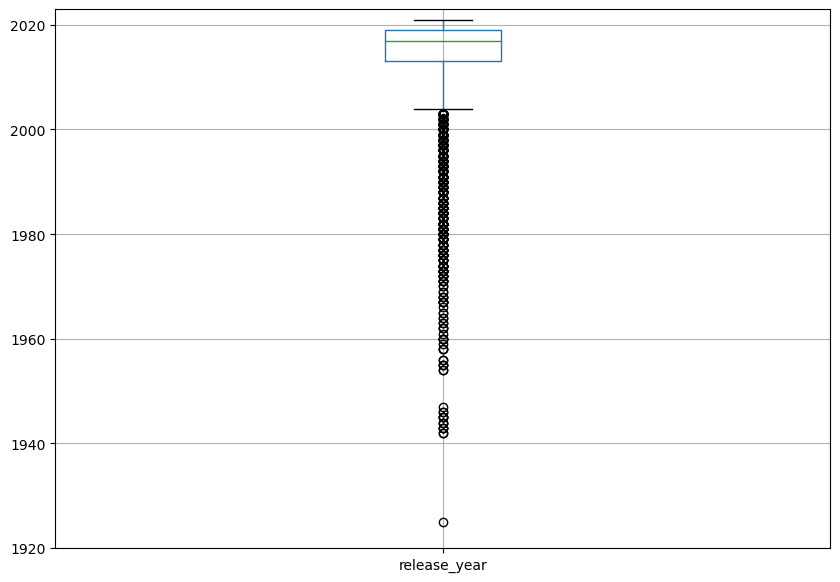

In [90]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
ax= df.boxplot()
ax.set_ylim(1920,2023)

array([[<Axes: title={'center': 'release_year'}>]], dtype=object)

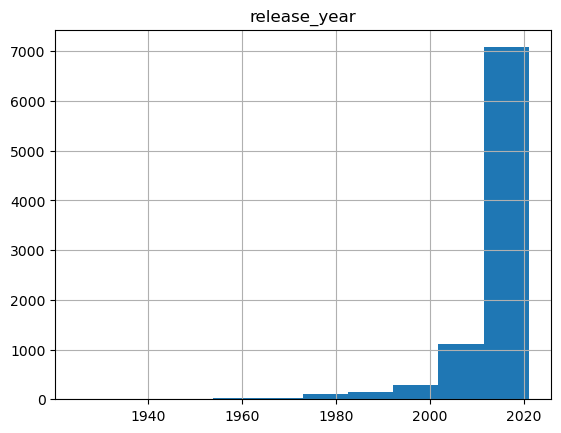

In [103]:
df.hist()

In [98]:
q1= df['release_year'].quantile(0.25)
q3= df['release_year'].quantile(0.75)
iqr= q3-q1
print("iqr=", iqr)

lb= q1-1.5*iqr
ub=q3+1.5*iqr
print("lower bound=", lb)
print("upper bound=", ub)


iqr= 6.0
lower bound= 2004.0
upper bound= 2028.0


In [99]:
values_less_than_lb = len(df[df['release_year'] <= lb])
print("Number of values less than lb:", values_less_than_lb)

Number of values less than lb: 781


In [96]:
filtered_df = df[(df['release_year'] >= lb) & (df['release_year'] <= ub)]
filtered_df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,9/24/2021,2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,NaN,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,NaN,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,NaN,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,NaN,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


array([[<Axes: title={'center': 'release_year'}>]], dtype=object)

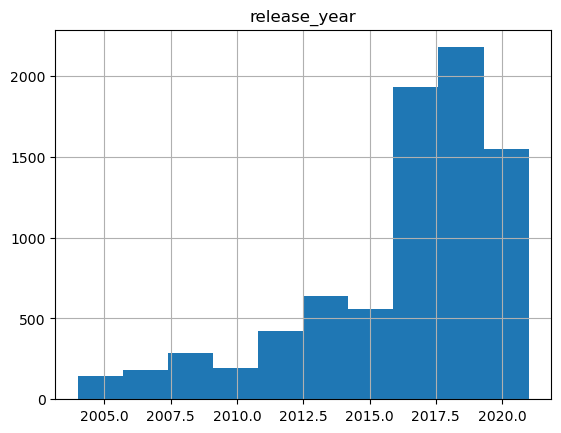

In [102]:
filtered_df.hist()